In [1]:
# Bibliotheken abrufen
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
%matplotlib inline
sns.set()

In [2]:
# URL als Variable definieren
url = "https://rodare.hzdr.de/api/records/?page=1&sort=mostrecent&size=1000"

In [3]:
# Funktion um Inhalt aus URL in Variable r zu speichern
r = requests.get(url)

In [4]:
# JSON lesen lassen
json = r.json()

In [5]:
# Dictionary anlegen und Keys der gewünschten Werte definieren
Meta_dict = {}
Meta_dict['type'] = []
Meta_dict['license'] = []
Meta_dict['rel_id'] = []
Meta_dict['pub_date'] = []
Meta_dict['Access_Right'] = []
Meta_dict['Downloads'] = []
Meta_dict['u_downloads'] = []
Meta_dict['u_views'] = []
Meta_dict['views'] = []
Meta_dict['ref_by'] = []
Meta_dict['doi'] = []

In [6]:
# Definition einer Teilliste und for-Schleife, um den type der Records aus allen Einträgen auszulesen und aufzulisten
for record in json['hits']['hits']:
    Meta_dict['type'].append(record['metadata']['resource_type']['type'])
# Definition einer if-else Bedingung für den Abruf der Lizenz (gibt es nicht bei closed Access Veröffentlichungen)    
    if 'license' in record['metadata'].keys():
        Meta_dict['license'].append(record['metadata']['license']['id'])
    else:
        Meta_dict['license'].append('NaN')
# Iteration in Liste der related identifier anlegen und dort die Bedigungen für das Auslesen definieren
    count_1 = 0
    count_2 = 0
    for identifier in record['metadata']['related_identifiers']:
# nur wenn die Relation 'isReferencedBy' mit dem dazugehörigen Inhalt hzdr gefunden wird, wird der count_1 betätigt
# Hintergrund: Zählung aus RODARE-Sicht ob Record den Archivierungsworkflow von ROBIS bedient
        if identifier['relation'] == 'isReferencedBy' and 'hzdr' in identifier['identifier']:
            count_1 = count_1 + 1
# nur wenn die Relation 'isReferencedBy' gefunden wird, wird der count_2 betätigt
# Hintergrund: Zählung aus RODARE-Sicht ob Record überhaupt ein zugehörige Referenz hat (ROBIS + x)            
        if identifier['relation'] == 'isReferencedBy':
            count_2 = count_2 + 1
    Meta_dict['rel_id'].append(count_1)
    Meta_dict['ref_by'].append(count_2)
# einfaches Auslesen der Metadaten und Zuordnung in entsprechende Listen/Keys
    # Publikationsdatum nach 10 Zeichen abgeschnitten
    Meta_dict['pub_date'].append(record['created'][:10])
    Meta_dict['Access_Right'].append(record['metadata']['access_right'])
    Meta_dict['Downloads'].append(int(record['stats']['downloads']))
    Meta_dict['u_downloads'].append(int(record['stats']['unique_downloads']))
    Meta_dict['u_views'].append(int(record['stats']['unique_views']))
    Meta_dict['views'].append(int(record['stats']['views']))
    Meta_dict['doi'].append(record['links']['doi'])

In [7]:
# Umwandlung des Dictionaries in ein DataFrame mit pd
df = pd.DataFrame(Meta_dict)

In [8]:
# Abbildung des Dataframes
df

,type,license,rel_id,pub_date,Access_Right,Downloads,u_downloads,u_views,views,ref_by,doi
0,other,CC-BY-4.0,0,2021-08-16,open,0,0,0,0,0,https://doi.org/10.14278/rodare.1117
1,other,CC-BY-4.0,0,2021-08-16,open,0,0,0,0,0,https://doi.org/10.14278/rodare.1115
2,dataset,CC-BY-4.0,1,2021-08-12,open,0,0,4,4,1,https://doi.org/10.14278/rodare.1111
3,dataset,CC-BY-4.0,1,2021-08-09,open,2,2,18,24,1,https://doi.org/10.14278/rodare.1098
4,dataset,CC-BY-4.0,0,2021-08-09,open,0,0,5,5,0,https://doi.org/10.14278/rodare.1105
...,...,...,...,...,...,...,...,...,...,...,...
267,dataset,CC-BY-SA-4.0,0,2018-05-09,open,23,22,340,402,0,https://doi.org/10.14278/rodare.24
268,dataset,CC-BY-4.0,0,2018-04-25,open,90,33,351,425,0,https://doi.org/10.14278/rodare.16
269,dataset,CC-BY-4.0,0,2018-04-12,open,23,18,287,344,0,https://doi.org/10.14278/rodare.8
270,dataset,NaN,0,2018-03-20,restricted,0,0,257,290,0,https://doi.org/10.14278/rodare.4


In [9]:
# Anzeige der Allgemeinen Eigenschaften der Spalten
df.describe(include='all')

,type,license,rel_id,pub_date,Access_Right,Downloads,u_downloads,u_views,views,ref_by,doi
count,272,272,272.000000,272,272,272.000000,272.000000,272.000000,272.000000,272.000000,272
unique,6,10,NaN,178,4,NaN,NaN,NaN,NaN,NaN,272
top,dataset,CC-BY-4.0,NaN,2021-03-10,open,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.14278/rodare.228
freq,207,127,NaN,18,155,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,0.610294,NaN,NaN,69.584559,26.397059,96.724265,139.636029,0.617647,NaN
std,NaN,NaN,0.496078,NaN,NaN,239.561808,73.190524,101.814322,129.176629,0.509088,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,39.750000,62.750000,0.000000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,5.000000,4.000000,67.500000,106.500000,1.000000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,37.000000,20.000000,101.750000,160.000000,1.000000,NaN


In [10]:
# Defintion und Berechungen zu Datumsangaben
aktuellesDatum = date.today()
rodare_pub = date(2018,2,28)
zeitraum = aktuellesDatum - rodare_pub
zr = zeitraum.days
ds = zr/len(df)
lpd = df['Downloads'].sum()/zr

In [11]:
# Ausgabe einige Sonderfälle und statistischer Werte
print('Stand',aktuellesDatum.strftime("%d.%m.%Y"),
      '\nSeit der Inbetriebnahme (28.02.2018) von RODARE sind',zeitraum.days,'Tage vergangen.\nInsgesamt wurden',
      str(len(df)),'Records veröffentlicht und',str(df['Downloads'].sum()),
      'mal gedownloaded.\nDas entspricht: 1 Veröffentlichung alle',round(ds,1),
      'Tage und' ,round(lpd,1), 'Downloads pro Tag. \nDer meistgeladene Record',
       df.iloc[df.Downloads.idxmax(), 10], 'wurde',df['Downloads'].max(),
      'mal gedownloaded. \nDer neueste Download',df.iloc[0, 10],
      'wurde am',df['pub_date'].max(),'veröffentlicht. \nDer meistangesehene Record',
      df.iloc[df.views.idxmax(), 10],'wurde',df['views'].max(),'mal angesehen. \nIm Durchschnitt wird 1 Record',
      round(df['views'].mean(),1),'mal angesehen und',round(df['Downloads'].mean(),1),
      'heruntergeladen. \nDie Standardabweichung für Downloads beträgt',round(df['Downloads'].std(),1)
      ,'und die für Views beträgt',round(df['views'].std(),1),'. ')

Stand 16.08.2021 
Seit der Inbetriebnahme (28.02.2018) von RODARE sind 1265 Tage vergangen.
Insgesamt wurden 272 Records veröffentlicht und 18927 mal gedownloaded.
Das entspricht: 1 Veröffentlichung alle 4.7 Tage und 15.0 Downloads pro Tag. 
Der meistgeladene Record https://doi.org/10.14278/rodare.915 wurde 2218 mal gedownloaded. 
Der neueste Download https://doi.org/10.14278/rodare.1117 wurde am 2021-08-16 veröffentlicht. 
Der meistangesehene Record https://doi.org/10.14278/rodare.915 wurde 848 mal angesehen. 
Im Durchschnitt wird 1 Record 139.6 mal angesehen und 69.6 heruntergeladen. 
Die Standardabweichung für Downloads beträgt 239.6 und die für Views beträgt 129.2 . 


In [12]:
# absolute Aufschlüsselung der Datentypen nach Anzahl
dt=df['type'].value_counts()
print(dt)

dataset         207
software         24
image            15
other            15
video             6
presentation      5
Name: type, dtype: int64


In [13]:
#Reduzierung der Datengrundlage und dort Werte ausgeben
df[df['type']=='dataset'].groupby(['license']).size()

license
CC-BY-1.0         4
CC-BY-4.0        88
CC-BY-NC-4.0      8
CC-BY-SA-4.0      3
NaN             104
dtype: int64

In [14]:
#
df[df['type']=='software'].max()

type                                       software
license                                         NaN
rel_id                                            1
pub_date                                 2021-08-06
Access_Right                             restricted
Downloads                                       120
u_downloads                                      59
u_views                                         416
views                                           569
ref_by                                            1
doi             https://doi.org/10.14278/rodare.992
dtype: object

In [15]:
df[df['type']=='dataset'].max()

type                                        dataset
license                                         NaN
rel_id                                            2
pub_date                                 2021-08-12
Access_Right                             restricted
Downloads                                      2218
u_downloads                                     910
u_views                                         697
views                                           848
ref_by                                            2
doi             https://doi.org/10.14278/rodare.998
dtype: object

In [16]:
# relative Aufschlüsselung der Datentypen nach Anzahl
df['type'].value_counts(normalize=True)

dataset         0.761029
software        0.088235
image           0.055147
other           0.055147
video           0.022059
presentation    0.018382
Name: type, dtype: float64

In [17]:
# absolute Aufschlüsselung der Lizenzen in Abhängigkeit des Datentypen mit Anzahl
df.groupby(['type','license']).size()

type          license     
dataset       CC-BY-1.0         4
              CC-BY-4.0        88
              CC-BY-NC-4.0      8
              CC-BY-SA-4.0      3
              NaN             104
image         CC-BY-1.0         1
              CC-BY-4.0         9
              NaN               5
other         CC-BY-4.0         9
              NaN               6
presentation  CC-BY-4.0         5
software      BSD-3-Clause      1
              CC-BY-4.0        10
              GPL-3.0           4
              GPL-3.0-only      4
              LGPL-3.0          3
              MIT               1
              NaN               1
video         CC-BY-4.0         6
dtype: int64

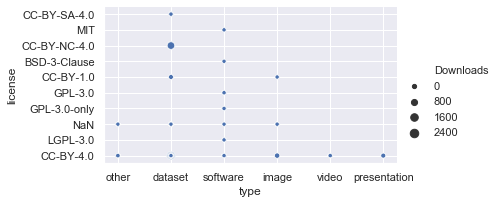

In [20]:
# Verteilung Lizenz pro Datentyp mit Downloads
sns.set(rc={"figure.figsize":(12, 12)})
sns.relplot(x='type', y='license', size='Downloads', data=df, height=3, aspect=2)
plt.savefig("./Pictures/Verteilung_Lizenz_Datentyp_Downloads.png", dpi=300)

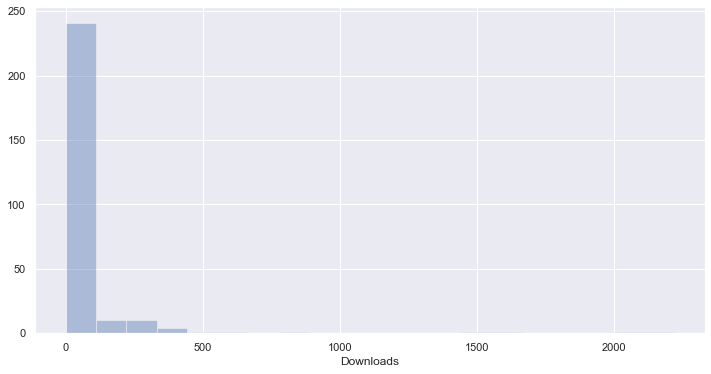

In [33]:
# graphische Darstellung der Downloadverteilung
sns.set(rc={"figure.figsize":(12, 6)})
sns.distplot(df['Downloads'],bins=20, kde=False)
plt.savefig("./Pictures/Verteilung_Downloads.png", dpi=300)

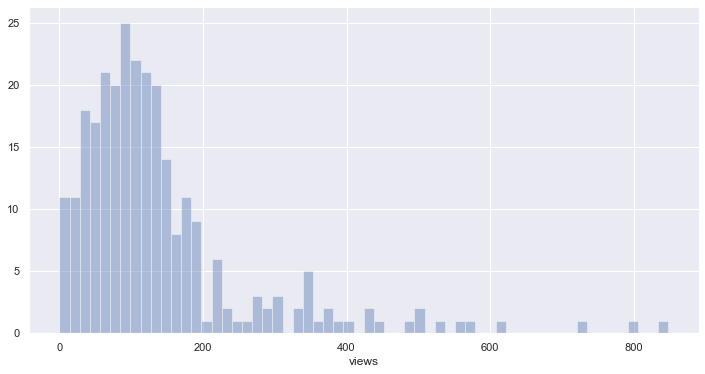

In [35]:
# graphische Darstellung der Viewverteilung in Relation zur Anzahl der Records
sns.set(rc={"figure.figsize":(12, 6)})
sns.distplot(df['views'],bins=60, kde=False)
plt.savefig("./Pictures/Verteilung_Views.png", dpi=300)

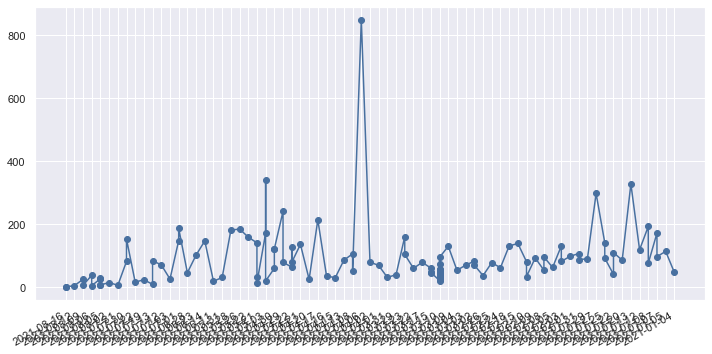

In [23]:
# graphische Darstellung der Views je Record in chronologischer Reihenfolge für bestimmten Zeitraum
start_date = '2021-01-01'
view_rec = plt.plot(df['pub_date'][df['pub_date'] >= start_date], 
         df['views'][df['pub_date'] >= start_date],
         color='#4870a0',
         marker='o')
# Dreht Achsenbeschriftung
plt.gcf().autofmt_xdate()
plt.savefig("./Pictures/Verteilung_Views_2021.png", dpi=300)

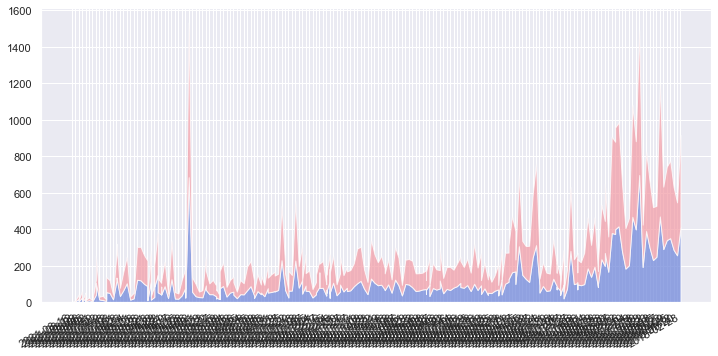

In [24]:
#Darstellung der Views und unique Views im Zeitverlauf
plt.stackplot(df['pub_date'], 
              df['u_views'], 
              df['views'],
              alpha=0.75,
              colors=['#7289da','#f29fa9'],
              labels=['u_views', 'views'],)
plt.gcf().autofmt_xdate()
plt.savefig("./Pictures/Verteilung_Views_uniqueViews.png", dpi=300)

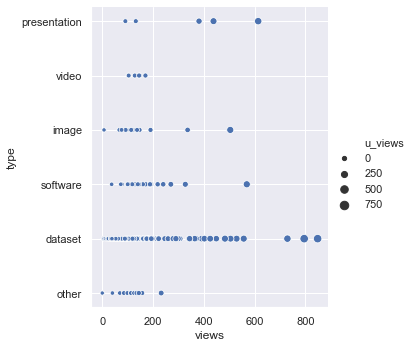

In [25]:
# Darstellung Views pro Datentyp mit Anzeige der unique Views
sns.set(rc={"figure.figsize":(12, 12)})
sns.relplot(y='type', x='views',size='u_views', data=df)
plt.savefig("./Pictures/Verteilung_Views_uniqueViews_Datentyp.png", dpi=300)

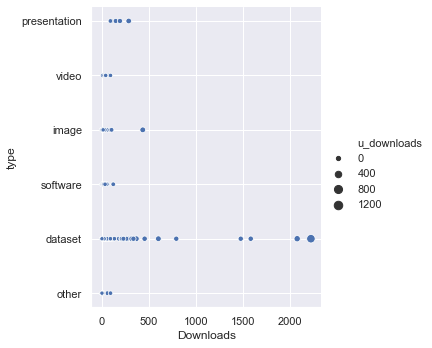

In [26]:
# Darstellung Downloads pro Datentyp mit Anzeige der unique Downloads
sns.relplot(y='type', x='Downloads',size='u_downloads', data=df)
plt.savefig("./Pictures/Verteilung_Downoads_uniqueDownloads_Datentyp.png", dpi=300)

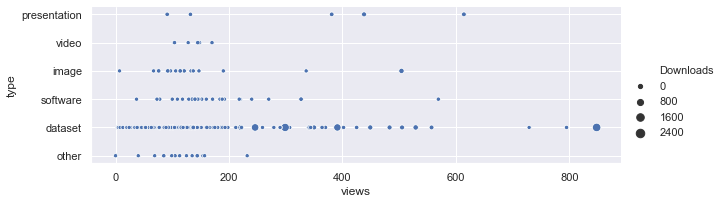

In [27]:
# Darstellung Views und Downloads pro Datentyp 
sns.relplot(x='views', y='type', 
            size='Downloads',
            #row='Access_Right', 
            #col='type', 
            data=df,
            height=3, aspect=3)
plt.savefig("./Pictures/Verteilung_Views_Downloads_Datentyp.png", dpi=300)